
# Template Matching 


The following are the three primary components we need:

* Source image: an image that should match the template image.
* Template image: image template that will be compared with image source.
* Comparision method: there are several comparison methods, including SAD, SSD, etc. 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

The next step is to define a comparison method. Our similarity measurement here was based on the sum of absolute differences. 

In [2]:
def template_matching_sad(source, temp):
    # Get the height and width of the image
    hs, ws = source.shape
    ht, wt = temp.shape
   
    #Storing scores
    score = np.empty((hs-ht, ws-wt))
  
   # Searching
    for dy in range(0, hs - ht):
        for dx in range(0, ws - wt):
            
           #Calculate Sum of Absolute Differences (SAD)
            diff = np.abs(source[dy:dy + ht, dx:dx + wt] - temp)
            score[dy, dx] = diff.sum()

       # Return the position of the lowest score 
    res = np.unravel_index(score.argmin(), score.shape)

    return (res[1], res[0])


# Task: 
Replace the image and template with your own if you wish. 


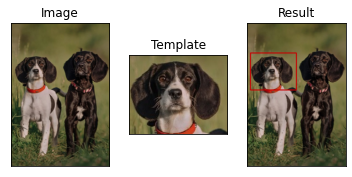

In [3]:
def main():
   # Get input image and template image
    img = cv.imread("Image.jpg")
    temp = cv.imread("Template.jpg")
    img2 = img.copy()
    temp2 = temp.copy()

    # Converting RGB to gray scale 
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)   
    temp = cv.cvtColor(temp, cv.COLOR_RGB2GRAY)   

     # Get the height and width of the image
    hs, ws = temp.shape

    #Applying template matching 
    res = template_matching_sad(img_gray, temp)
    
    # Showing template matching result
    cv.rectangle(img, (res[0], res[1]), (res[0] + ws, res[1] + hs), (0,0,200), 3)
    plt.subplot(131),
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title('Image'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(132),
    plt.imshow(cv.cvtColor(temp2, cv.COLOR_BGR2RGB))
    plt.title('Template'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(133),
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Result'), plt.xticks([]), plt.yticks([])
    
    
plt.show()
if __name__ == "__main__":
    main()




# Template Matching using opencv 

Open CV has a number of template matching methods available, including those listed below.  `TM_SQDIFF`,`TM_SQDIFF_NORMED`,`TM_CCORR`,`TM_CCORR_NORMED`,`TM_CCOEFF `,`TM_CCOEFF_NORMED`.

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Insert image 
img = cv.imread('Image.jpg',0)
img2 = img.copy()

#Insert template 
template = cv.imread('Template.jpg',0)

#Define template shape 
w, h = template.shape[::-1]

# Please select your specific methods from the comparison methods list
# For example cv.comparision_method
methods = ['cv.TM_CCORR_NORMED']

The template matching operation includes three arguments: the source image, the template image, and the match_method (provided by the user). 

In [10]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)

Finally we will show the result. 

In [11]:
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()